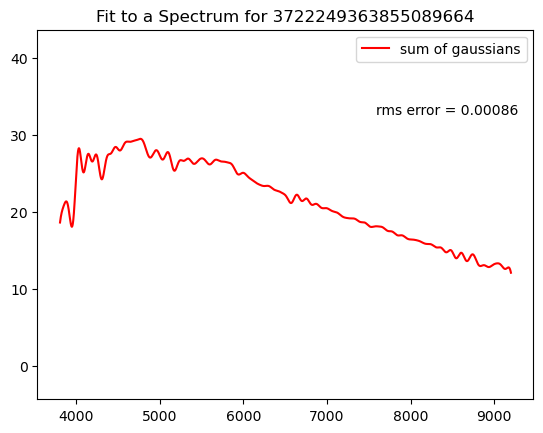

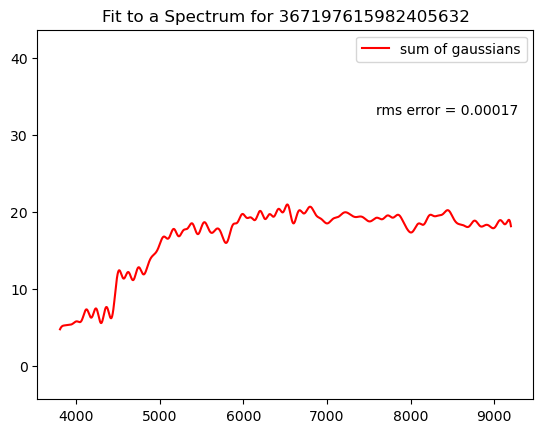

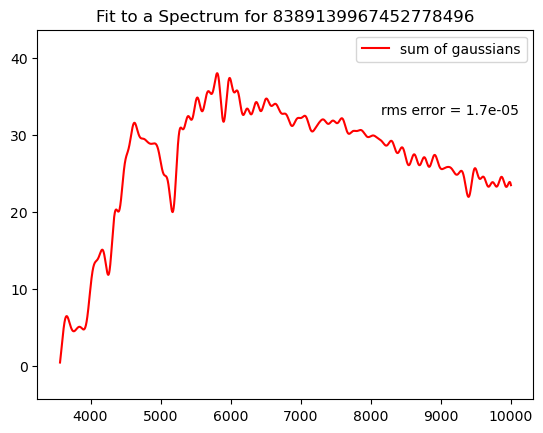

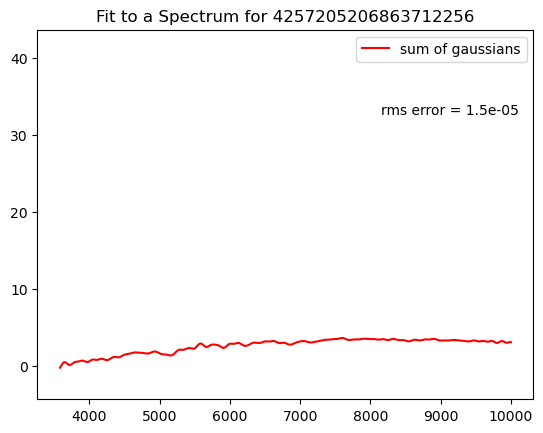

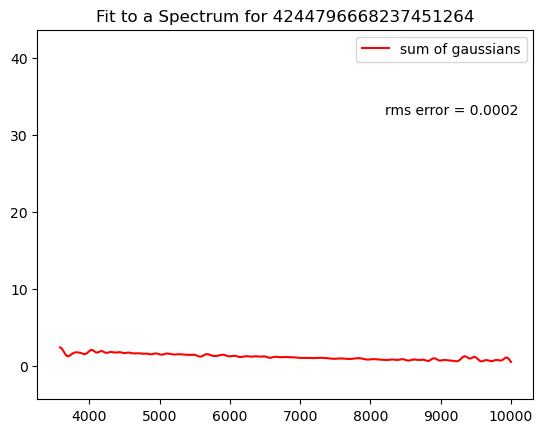

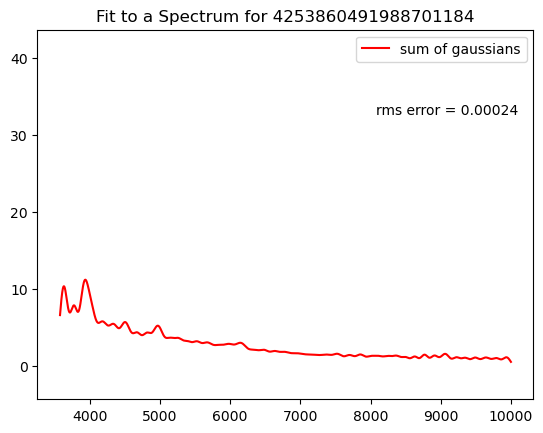

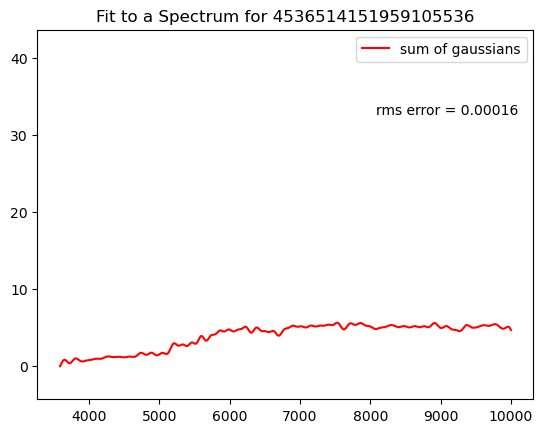

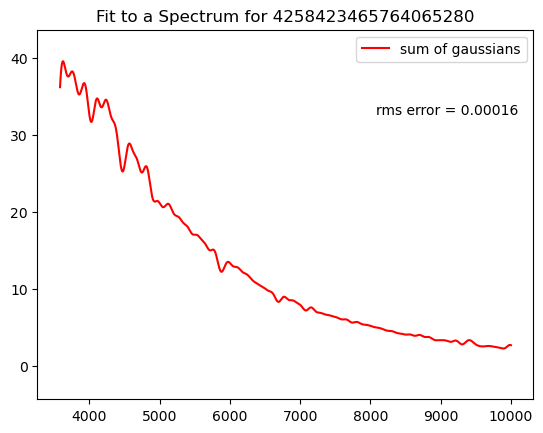

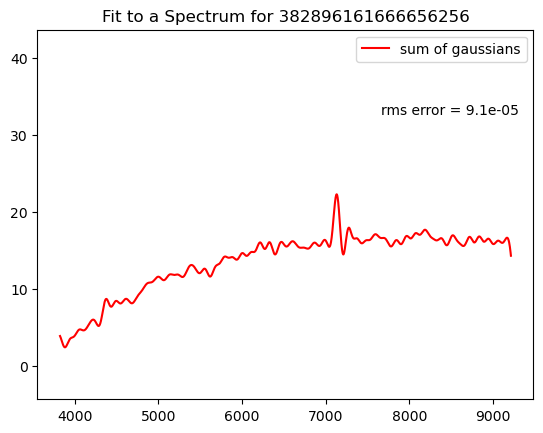

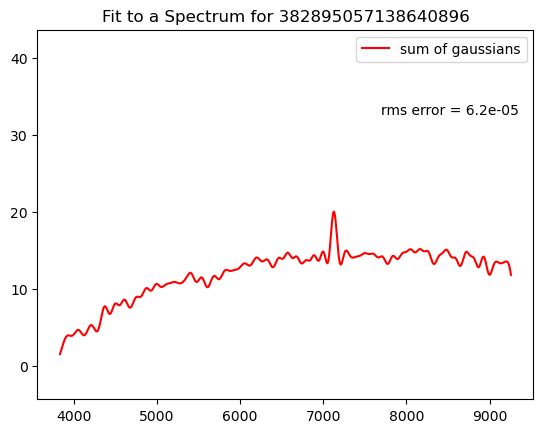

In [33]:
import sdss
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import pyplot as plt
from astroML.sum_of_norms import sum_of_norms, norm

object_ids = [
    '3722249363855089664',
    '367197615982405632',
    '8389139967452778496',
    '4257205206863712256',
    '4244796668237451264',
    '4253860491988701184',
    '4536514151959105536',
    '4258423465764065280',
    '382896161666656256',
    '382895057138640896',
]

# source_id column in gaia tables
gaia_object_ids = [
    '3697673684568672128',
    '3796709621755671936',
    '3083075344961618432',
    '3838985152354159616',
    '3830530629490514688',
    '3695424706549076096',
    '3649931446581878016',
    '3827682344618411776',
    '3685862906757553664',
    '3685862906757553664',
]



for object_id in object_ids:
    sp = sdss.SpecObj(object_id)
    data = SDSS.get_spectra(plate=sp.plate, mjd=sp.mjd, fiberID=sp.fiberID)
    if data and len(data) > 0 and len(data[0]) > 1 and hasattr(data[0][1], 'data'):

        spec_data = data[0][1].data

        x = wavelength = 10 ** spec_data['loglam']  # Convert logarithmic wavelength to linear
        y = flux = spec_data['flux']

        # truncate the spectrum
        mask = (x >= 2000) & (x < 10000)
        x = x[mask]
        y = y[mask]

        w_best, rms, locs, widths = sum_of_norms(x, y, 100,
                                                 spacing='linear',
                                                 full_output=True)

        norms = w_best * norm(x[:, None], locs, widths)

        # plot the results
        
        #Original spectrum
        #plt.figure()
        #plt.plot(x, y, '-k', label='input spectrum')
        #ylim = plt.ylim()

        #Individual gaussians
        #plt.plot(x, norms, ls='-', c='#FFAAAA')
        
        #Sum of gaussians
        plt.plot(x, norms.sum(1), '-r', label='sum of gaussians')
        plt.ylim(-0.1 * ylim[1], ylim[1])

        plt.legend(loc=0)

        plt.text(0.97, 0.8,"rms error = %.2g" % rms,ha='right', va='top', transform=plt.gca().transAxes)
        plt.title("Fit to a Spectrum for %s" % object_id)

        plt.show()
    else:
        print ('Doesnt exist')
    